## Técnicas de Suavizado 

___
# SMA
## Simple Moving Average : Promedio móvil simple

$SMA=\frac{x_1+x_2+...+x_n}{n} $

donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $n$ períodos atrás.

___
# EWMA
## Exponentially Weighted Moving Average: Promedio móvil ponderado exponencialmente



EWMA nos permitirá reducir el efecto de retraso de SMA y pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA, la fórmula con la que se calculan las estimaciones es:

### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Donde $x_t$ son los valores de la variable, $w_i$ son los pesos (desde $i=0$ hasta $t$), y la $y_t$ es la estimación resultante.

La pregunta es ¿cómo se deben definir los pesos $w_i$?

Esto depende del argumento <tt>adjust</tt> dentro de la función <tt>.ewm()</tt>.

Cuando <tt>adjust=True</tt> (por defecto), los pesos se calculan con esta ecuación: $w_i = (1 - \alpha)^i$

Lo cual resulta en estas estimaciones:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Cuando <tt>adjust=False</tt> las estimaciones se calculan como:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

que es equivalente a usar estos pesos:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{si } i < t \\
    (1 - \alpha)^i        & \text{si } i = t.
\end{cases}\end{split}

El parámetro de suavizado $\alpha$ tiene que ser un valor $0<\alpha≤1$.
Es posible pasar directamente el valor del parámetro, pero una mejor práctica es pensar en él como una función de estos tres posibles factores:
1. Span (duración)
2. Center of mass (centro de masa)
3. Half-life (vida media)

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{para una duracion (span)}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{para un centro de masa}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{para un parametro half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponde a lo que comúnmente se llama un "promedio móvil de N-períodos"
* <strong>Center of mass</strong> tiene una interpretación más física y se puede pensar en términos de la duración: $c=(s−1)/2$
* <strong>Half-life</strong> es el período de tiempo para que el peso exponencial se reduzca a la mitad.
* <strong>Alpha</strong> es el parámetro de suavizado directamente.

Tenemos que pasar alguno de esos argumentos a la función. En nuestro ejemplo vamos a usar <tt>span=12</tt>.

## Comparación de SMA y EWMA

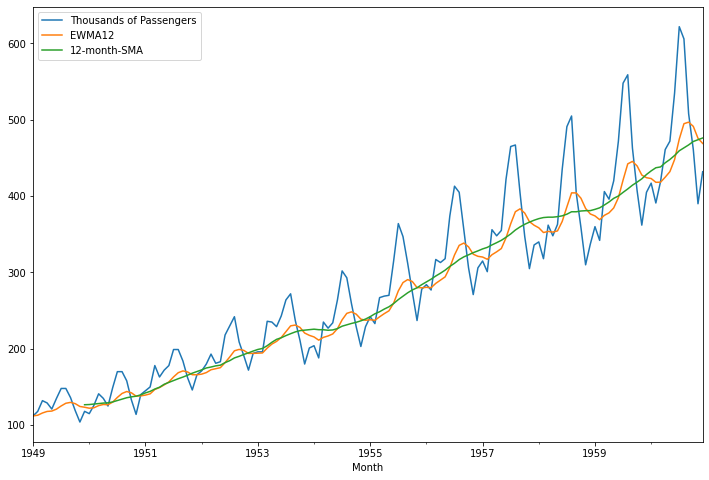

In [10]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8));

## Suavizado exponencial simple
El ejemplo anterior hemos empleado una especie de <em> Suavizado exponencial simple </em> con un factor de suavizado <strong> α </strong>. Desafortunadamente, esta técnica hace un mal trabajo de pronóstico cuando hay una tendencia en los datos como se ve arriba. En la siguiente sección veremos <em> Suavizado exponencial doble </em>  y <em> triple </em> con el método Holt-Winters.